* pyenvのanaconda3-4.3.0のvirtualenv環境下にpymc3をinstall  

```
pip install --process-dependency-links git+https://github.com/pymc-devs/pymc3
```

[PyMC3で簡単なMCMCチュートリアルを試したメモ](http://qiita.com/fullflu/items/cbc6b17271b438cbe495)

In [16]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import theano.tensor as T
%matplotlib inline

In [11]:
def invlogit(v):
    return T.exp(v) / (T.exp(v) + 1)

In [34]:
datum = np.loadtxt("../women.tsv", delimiter="\t", usecols=(1, 2), skiprows=1)
weights = np.transpose(datum)[0]
heights = np.transpose(datum)[1]
Y = np.array([0,0,0,0,0,0,0,1,1,1,1,1,1,1,1])

In [39]:
datum

array([[  58.,  115.],
       [  59.,  117.],
       [  60.,  120.],
       [  61.,  123.],
       [  62.,  126.],
       [  63.,  129.],
       [  64.,  132.],
       [  65.,  135.],
       [  66.,  139.],
       [  67.,  142.],
       [  68.,  146.],
       [  69.,  150.],
       [  70.,  154.],
       [  71.,  159.],
       [  72.,  164.]])

In [36]:
def invlogit(v):
    return T.exp(v) / (T.exp(v) + 1)

In [40]:
with pm.Model() as model_hier:
    s = pm.Uniform('s', 0, 1.0E+4)
    beta = pm.Normal('beta', 0, 1.0E+4, shape=datum.shape[1] + 1)
    r = pm.Normal('r', 0, s, shape=datum.shape[0])
    q = invlogit(beta[0] + beta[1]*datum[:,0] + beta[2]*datum[:,1] + r)
    y = pm.Bernoulli('y', q, observed=Y)
    
    step = pm.Slice([s, beta, r])
    trace_hier = pm.sample(1000, step)

100%|██████████| 1000/1000 [00:01<00:00, 592.47it/s]


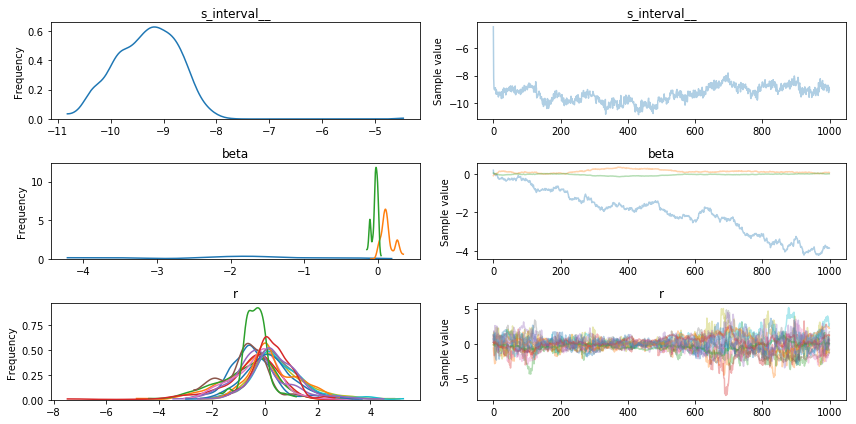

In [41]:
with model_hier:
    pm.traceplot(trace_hier, model_hier.vars)